# EDA Work

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import statsmodels.api as sm


## Contents

**bom.movie_gross:** domestic and foreign gross for 2010-2018 (**Box Office Mojo**)  
**im.db:** (**Internet Movie Database**)  
**rt.movie_info**: movie reviews without the title (**Rotten Tomatoes**)  
**rt.movie_reviews:** movie reviews / quick summaries from Rotten Tomatoes (**Rotten Tomatoes**)  
**tmdb.io** movie budgets  (**The Movie Database**)  
**tn.movie_budgets:** movie budget info (**The Numbers**)  


## Interesting Questions to Pursue
- Which people are affiliated with movies with high ROI (4x)?  
-- Need to figure out how to normalize movie title
- Which genres are affiliated with highest ROI?
- Which rating levels have the highest ROI?
- For low budget movies (<$5 million), what genre, director/writers, and universities are associated with high profit movies 
-- Use TMDB data, get 200 representative movies from each genre.  Use ANOVA test to test for similarity and then twokey_hsd to help

## Explore Database

In [23]:
df = pd.read_csv("Data/bom.movie_gross.csv")
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [24]:
df2 = pd.read_csv("Data/rt.movie_info.tsv",delimiter="\t")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [25]:
df3 = pd.read_csv("Data/rt.reviews.tsv", delimiter="\t", encoding='windows-1252')
df3.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [26]:
pd.read_csv("Data/tmdb.movies.csv")

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [27]:
df4 = pd.read_csv("Data/tn.movie_budgets.csv")
df4.head(40)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [28]:
conn = sqlite3.connect("Data/im.db")

query = """
SELECT * 
  FROM sqlite_master
"""

pd.read_sql(query, conn)


,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [147]:
query = """
SELECT *
  FROM movie_basics
"""

genres_list = pd.read_sql(query, conn)
genres_list

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [149]:
query = """
SELECT primary_title, original_title, primary_name
  FROM movie_basics
       JOIN principals USING(movie_id)
       JOIN persons USING(person_id)
"""

df_principals = pd.read_sql(query, conn)
df_principals

,primary_title,original_title,primary_name
0,Sunghursh,Sunghursh,Naushad
1,Sunghursh,Sunghursh,Abrar Alvi
2,Sunghursh,Sunghursh,Gulzar
3,Sunghursh,Sunghursh,Dilip Kumar
4,Sunghursh,Sunghursh,Sanjeev Kumar
...,...,...,...
1027907,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,Ricardo Albuquerque
1027908,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,Marcelo Alves
1027909,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,Angela Gurgel
1027910,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,Fábio Ferraz


In [31]:
df_principals[df_principals["primary_title"] == "Jurassic World"]

,primary_title,original_title,primary_name
487,Jurassic World,Jurassic World,Michael Crichton
488,Jurassic World,Jurassic World,Patrick Crowley
489,Jurassic World,Jurassic World,Judy Greer
490,Jurassic World,Jurassic World,Bryce Dallas Howard
491,Jurassic World,Jurassic World,Rick Jaffa
492,Jurassic World,Jurassic World,Chris Pratt
493,Jurassic World,Jurassic World,Amanda Silver
494,Jurassic World,Jurassic World,Colin Trevorrow
495,Jurassic World,Jurassic World,Ty Simpkins
496,Jurassic World,Jurassic World,Derek Connolly


In [32]:
query = """
SELECT *
  FROM movie_akas
"""

pd.read_sql(query, conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [33]:
query = """
SELECT *
  FROM persons
"""

pd.read_sql(query, conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


## Top-10 Movies (tn)

Biggest domestic gross movies include Titanic, Avatar, Star Wars, and Jurassic Park.

In [34]:
df4.sort_values("worldwide_gross", ascending=False)
df4.loc[:,"worldwide_gross"] = df4["worldwide_gross"].str.replace("$", "", regex=False)
df4.loc[:,"worldwide_gross"] = df4["worldwide_gross"].str.replace(",", "", regex=False).astype(int)
#pd.to_numeric(temp)
df4["worldwide_gross"]

0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: worldwide_gross, Length: 5782, dtype: object

In [35]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [36]:
df4.sort_values("production_budget", ascending=False)
df4.loc[:,"production_budget"] = df4["production_budget"].str.replace("$", "", regex=False)
df4.loc[:,"production_budget"] = df4["production_budget"].str.replace(",", "", regex=False).astype(int)
#pd.to_numeric(temp)
df4["production_budget"]

0       425000000
1       410600000
2       350000000
3       330600000
4       317000000
          ...    
5777         7000
5778         6000
5779         5000
5780         1400
5781         1100
Name: production_budget, Length: 5782, dtype: object

In [37]:
df4.sort_values("worldwide_gross", ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279
42,43,"Dec 19, 1997",Titanic,200000000,"$659,363,944",2208208395
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,"$936,662,225",2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,"$678,815,482",2048134200
33,34,"Jun 12, 2015",Jurassic World,215000000,"$652,270,625",1648854864
...,...,...,...,...,...,...
5474,75,"Dec 31, 2005",Insomnia Manica,500000,$0,0
5473,74,"Jul 17, 2012",Girls Gone Dead,500000,$0,0
5472,73,"Apr 3, 2012",Enter Nowhere,500000,$0,0
5471,72,"Dec 31, 2010",Drones,500000,$0,0


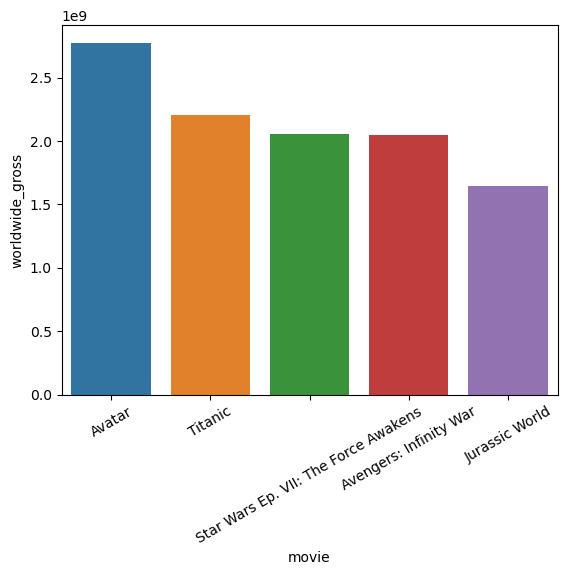

In [38]:
fig, ax = plt.subplots()
sns.barplot(data=df4.sort_values("worldwide_gross", ascending=False).head(5), x="movie", y="worldwide_gross", ax=ax)
ax.tick_params("x", rotation=30)

## The Highest Rates of Return (tn)

### The Numbers

The median rate of return on a film is 1.7x the production budget.  The highest rate of return is 500 for Mad Max, Paranormal Activity, Blair Witch, etc.  
Using a linear model, the rate of return is 3.0

In [39]:
df4["rate_return"] = df4["worldwide_gross"]/df4["production_budget"]
df4.sort_values("rate_return", ascending=False).head(50)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,rate_return
5745,46,"Jun 30, 1972",Deep Throat,25000,"$45,000,000",45000000,1800.0
5613,14,"Mar 21, 1980",Mad Max,200000,"$8,750,000",99750000,498.75
5492,93,"Sep 25, 2009",Paranormal Activity,450000,"$107,918,810",194183034,431.517853
5679,80,"Jul 10, 2015",The Gallows,100000,"$22,764,410",41656474,416.56474
5406,7,"Jul 14, 1999",The Blair Witch Project,600000,"$140,539,099",248300000,413.833333
5709,10,"May 7, 2004",Super Size Me,65000,"$11,529,368",22233808,342.058585
5346,47,"Aug 13, 1942",Bambi,858000,"$102,797,000",268000000,312.354312
5773,74,"Feb 26, 1993",El Mariachi,7000,"$2,040,920",2041928,291.704
5676,77,"Oct 1, 1968",Night of the Living Dead,114000,"$12,087,064",30087064,263.921614
5210,11,"Nov 21, 1976",Rocky,1000000,"$117,235,147",225000000,225.0


<Axes: xlabel='production_budget', ylabel='worldwide_gross'>

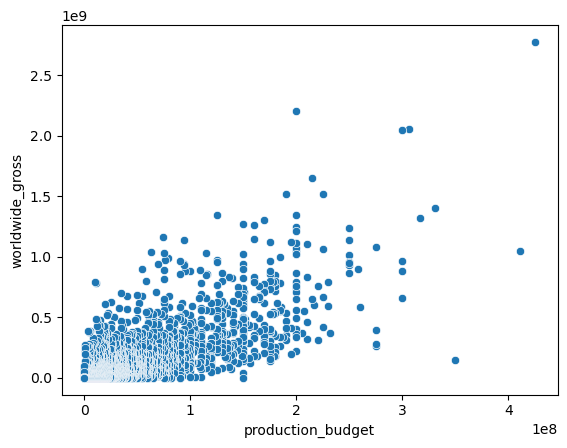

In [40]:
sns.scatterplot(data=df4,x="production_budget", y="worldwide_gross")

In [41]:
df4["worldwide_gross"] = df4["worldwide_gross"].astype(int)
df4["production_budget"] = df4["production_budget"].astype(int)
df4["production_budget"]

0       425000000
1       410600000
2       350000000
3       330600000
4       317000000
          ...    
5777         7000
5778         6000
5779         5000
5780         1400
5781         1100
Name: production_budget, Length: 5782, dtype: int64

                                 OLS Regression Results                                
Dep. Variable:        worldwide_gross   R-squared (uncentered):                 -21.173
Model:                            OLS   Adj. R-squared (uncentered):            -21.177
Method:                 Least Squares   F-statistic:                             -5520.
Date:                Thu, 03 Oct 2024   Prob (F-statistic):                        1.00
Time:                        05:05:03   Log-Likelihood:                     -1.1557e+05
No. Observations:                5782   AIC:                                  2.311e+05
Df Residuals:                    5781   BIC:                                  2.312e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

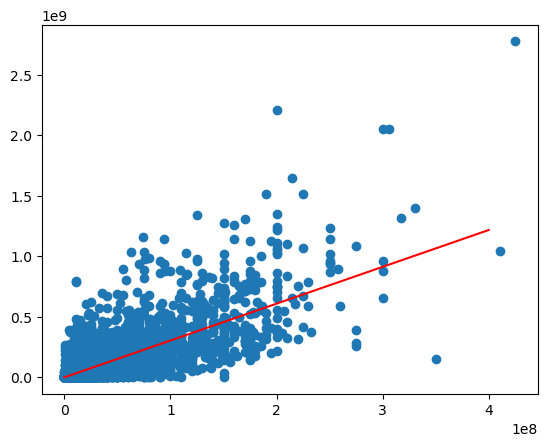

In [42]:

model = sm.regression.linear_model.OLS(endog=df4["worldwide_gross"], exog=df4["production_budget"])
results = model.fit()
print(results.summary())

x = np.linspace(0,400000000) 
y_predict = results.predict(x)

fig, ax = plt.subplots()
ax.scatter(x=df4["production_budget"], y=df4["worldwide_gross"])
ax.plot(x, y_predict, color="r")

Mean Factor:  4.8001613657949695
Median Factor:  1.7083098257683216


(0.0, 10.0)

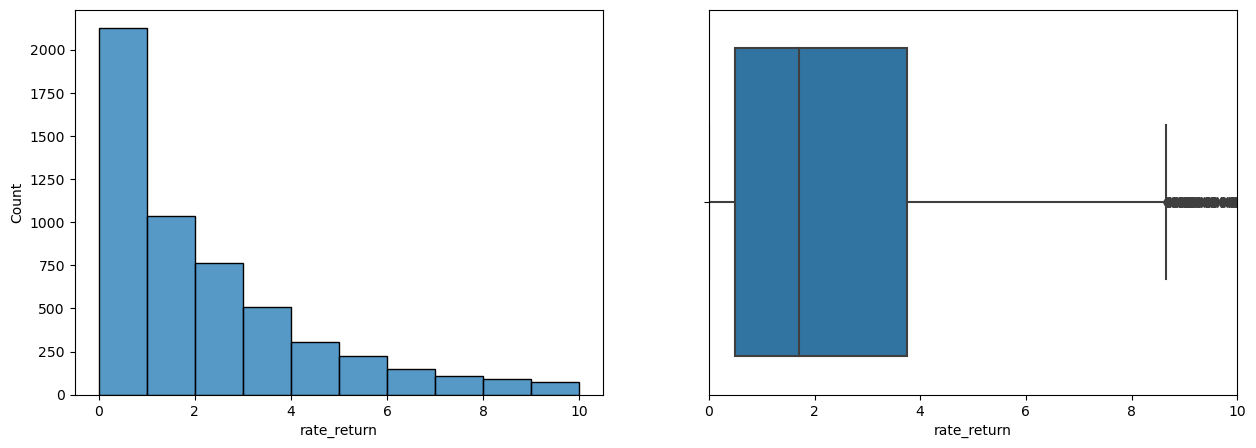

In [43]:
fig, ax = plt.subplots(1,2, figsize=[15,5])
sns.histplot(data=df4, x="rate_return", bins=range(0,11,1), binrange=[0,10], ax=ax[0] )

print("Mean Factor: ", df4["rate_return"].mean())
print("Median Factor: ", df4["rate_return"].median())
sns.boxplot(data=df4, x="rate_return", ax=ax[1])
ax[1].set_xlim(0,10)

### Box Office Mojo 
Explore rates of return from Box Office Mojo as well and see if they are consistent. There is a similar list of top 5 films of all time.

In [44]:
df.sort_values("domestic_gross", ascending=False).head(15)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3082,Incredibles 2,BV,608600000.0,634200000,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000,2017
2324,Finding Dory,BV,486300000.0,542300000,2016


## People Affliated with High ROI Movies (tn and IMDB)


Tricky to match up movie ROI data with people involved in movies, as names of movies do not mathup well. **Need to fix up matching, as many movies are being dropped.  
Standardize on movie name.

In [45]:
movies_principals = set(df_principals["primary_title"])
count = 0
for movie in df4["movie"]:
    if movie in movies_principals:
        count += 1
    else:
        print(movie)
print(count)

Star Wars Ep. VIII: The Last Jedi
Star Wars Ep. VII: The Force Awakens
Pirates of the Caribbean: At Worldâs End
Spider-Man 3
Harry Potter and the Half-Blood Prince
Superman Returns
Quantum of Solace
Pirates of the Caribbean: Dead Manâs Chest
The Chronicles of Narnia: Prince Caspian
Transformers: Revenge of the Fallen
X-Men: The Last Stand
The Golden Compass
Guardians of the Galaxy Vol 2
Spider-Man 2
Tron: Legacy
2012
Terminator Salvation
Prince of Persia: Sands of Time
Disneyâs A Christmas Carol
The Dark Knight
Indiana Jones and the Kingdom of the Crystal Skull
The Chronicles of Narnia: The Lion, the Witch and the Wardrobe
WALL-E
Rush Hour 3
Mission: ImpossibleâFallout
Up
Ralph Breaks The Internet
Monsters vs. Aliens
G.I. Joe: The Rise of Cobra
Wild Wild West
The Mummy: Tomb of the Dragon Emperor
Evan Almighty
Waterworld
The Polar Express
Terminator 3: Rise of the Machines
Van Helsing
Cowboys and Aliens
Shrek the Third
Fast and Furious 6
The Curious Case of Benjamin Button
Pose

In [46]:
def get_ROI(title):
    return df4.loc[df4["movie"] == title, "rate_return"]

movies_highROI = df4.loc[df4["rate_return"] >= 6, ["movie","rate_return"]]
principals_roi = movies_highROI.set_index("movie").join(df_principals.set_index("primary_title"))

principals_roi.groupby("primary_name").count().sort_values("rate_return", ascending=False).head(40)

,rate_return,original_title
primary_name,,
Jason Blum,31,31
James Wan,9,9
Michael Bay,8,8
Jennifer Lawrence,8,8
Andrew Form,7,7
Oren Peli,7,7
Christopher Landon,6,6
Kristen Wiig,6,6
Kevin Hart,6,6


## Consider Rotten Tomatoes Reviews - Look at Percentage Rated Fresh (rt)

Consider metric: fraction of reviews marked "fresh"
Predictor: director

Top Directors:
- Steven Spielberg (8)
- Clint Eastwood (5)
- Alfred Hitchcock (4)
- Woody Allen (3)
- David Fincher (3)
- Werner Herzog (3)
- Ridley Scott (3)
- Yimou Zhang (3)
- John Frankenheimer (3)

Top Writers Include:
- Woody Allen (3)
- John Hodge (2)
- Steven Zaillian (2)
- Paul Laverty (2)
- Richard Brooks (2)
- Jim Jarmusch (2)
- Paul Schrader (2)
- Werner Herzog (2)


In [47]:
df3["fresh_bool"] = df3["fresh"] == "fresh"
count_fresh = df3[["id","fresh_bool"]].groupby("id").sum()
count_total = df3[["id","fresh_bool"]].groupby("id").count()

fraction_fresh = count_fresh/count_total

fraction_fresh = df2.set_index("id").join(fraction_fresh)
fraction_fresh.dropna(subset=["fresh_bool"], axis=0, inplace=True)
fraction_fresh.sort_values("fresh_bool", ascending=False).head(20)

fraction_fresh[fraction_fresh["fresh_bool"] > 0.7].groupby("director").count().sort_values("synopsis", ascending=False).head(20)

,synopsis,rating,genre,writer,theater_date,dvd_date,currency,box_office,runtime,studio,fresh_bool
director,,,,,,,,,,,
Steven Spielberg,8,8,8,7,8,8,2,2,8,4,8
Clint Eastwood,5,5,5,4,5,5,2,2,5,2,5
Alfred Hitchcock,4,4,4,3,4,4,0,0,4,0,4
Woody Allen,3,3,3,3,3,3,1,1,3,1,3
David Fincher,3,3,3,3,3,3,2,2,3,3,3
Werner Herzog,3,3,3,2,3,3,1,1,3,1,3
Ridley Scott,3,3,3,2,3,3,1,1,3,2,3
Yimou Zhang,3,3,3,2,2,2,1,1,3,1,3
John Frankenheimer,3,3,3,2,3,3,0,0,3,0,3


In [48]:
df3["fresh_bool"] = df3["fresh"] == "fresh"
count_fresh = df3[["id","fresh_bool"]].groupby("id").sum()
count_total = df3[["id","fresh_bool"]].groupby("id").count()

fraction_fresh = count_fresh/count_total

fraction_fresh = df2.set_index("id").join(fraction_fresh)
fraction_fresh.dropna(subset=["fresh_bool"], axis=0, inplace=True)
fraction_fresh.sort_values("fresh_bool", ascending=False).head(20)

fraction_fresh[fraction_fresh["fresh_bool"] > 0.7].groupby("writer").count().sort_values("synopsis", ascending=False).head(20)

,synopsis,rating,genre,director,theater_date,dvd_date,currency,box_office,runtime,studio,fresh_bool
writer,,,,,,,,,,,
Woody Allen,3,3,3,3,3,3,1,1,3,1,3
John Hodge,2,2,2,2,2,2,1,1,2,2,2
Steven Zaillian,2,2,2,2,2,2,1,1,2,2,2
Paul Laverty,2,2,2,2,2,2,1,1,2,1,2
Richard Brooks,2,2,2,2,2,2,0,0,2,1,2
Jim Jarmusch,2,2,2,2,2,2,0,0,2,1,2
Paul Schrader,2,2,2,2,2,2,0,0,2,1,2
Werner Herzog,2,2,2,2,2,2,0,0,2,0,2
Melvin Frank|Norman Panama,1,1,1,1,1,1,0,0,1,0,1


## Identify Features of Movies Under $5 Million Budget and Positive ROI vs. Negative ROI.  


Add data features:
- Profit for Movies
- Does MPAA Rating Affect Success?
- Does Genre Affect Success?

In [49]:
df4

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,rate_return
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279,6.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,2.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350,0.427892
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,4.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,4.153696
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,$0,0,0.0
5778,79,"Apr 2, 1999",Following,6000,"$48,482",240495,40.0825
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,"$1,338",1338,0.2676
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,$0,0,0.0


In [50]:
df4["profit"] = df4["worldwide_gross"] - df4["production_budget"]

In [51]:
df4.sort_values("profit", ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,rate_return,profit
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279,6.532577,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,"$659,363,944",2208208395,11.041042,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,"$678,815,482",2048134200,6.827114,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,"$936,662,225",2053311220,6.710167,1747311220
33,34,"Jun 12, 2015",Jurassic World,215000000,"$652,270,625",1648854864,7.669092,1433854864
...,...,...,...,...,...,...,...,...
352,53,"Apr 27, 2001",Town & Country,105000000,"$6,712,451",10364769,0.098712,-94635231
341,42,"Jun 14, 2019",Men in Black: International,110000000,"$3,100,000",3100000,0.028182,-106900000
193,94,"Mar 11, 2011",Mars Needs Moms,150000000,"$21,392,758",39549758,0.263665,-110450242
194,95,"Dec 31, 2020",Moonfall,150000000,$0,0,0.0,-150000000


In [52]:
low_budget_movies = df4[df4.production_budget < 5000000]

def get_genre(df, title):
    return df.loc[df.primary_title.str.fullmatch(title, case=False),"genres"]

#low_budget_movies.set_index("movie", inplace=True)
#genres_list.set_index("primary_title", inplace=True)

low_budget_movies.join(genres_list)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,rate_return,profit,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
4400,1,"Jan 23, 2015",Mommy,4900000,"$3,498,695",17536004,3.578776,12636004,tt10408950,Myrtle,Myrtle,2019,5.0,"Action,Animation,Comedy"
4401,2,"Aug 29, 2008",Obsluhoval jsem anglickÃ©ho krÃ¡le,4900000,"$617,228",7174984,1.464282,2274984,tt10408968,Obscure,Obscure,2019,92.0,Drama
4402,3,"Aug 20, 2010",Soul Kitchen,4900000,"$276,901",23347461,4.764788,18447461,tt10408984,Beyond The Spectrum - Maussan's UFO Files,Beyond The Spectrum - Maussan's UFO Files,2019,45.0,Documentary
4403,4,"Aug 17, 2012",The Awakening,4900000,"$95,933",6924321,1.413127,2024321,tt10409050,Au-delà de la mer Égée,Au-delà de la mer Égée,2020,NaN,Drama
4404,5,"Jan 18, 2008",All Hat,4900000,"$15,198",15198,0.003102,-4884802,tt10409102,Man Under Table,Man Under Table,2019,79.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,$0,0,0.0,-7000,tt1183917,Teen Patti,Teen Patti,2010,142.0,"Crime,Drama,Thriller"
5778,79,"Apr 2, 1999",Following,6000,"$48,482",240495,40.0825,234495,tt1183919,Marley,Marley,2012,144.0,"Biography,Documentary,Music"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,"$1,338",1338,0.2676,-3662,tt1183923,Welcome to the Rileys,Welcome to the Rileys,2010,110.0,Drama
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,$0,0,0.0,-1400,tt1183930,Diagnosis Superstar,Diagnosis Superstar,2011,84.0,"Comedy,Drama"


In [57]:
low_budget_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,rate_return,profit
4400,1,"Jan 23, 2015",Mommy,4900000,"$3,498,695",17536004,3.578776,12636004
4401,2,"Aug 29, 2008",Obsluhoval jsem anglickÃ©ho krÃ¡le,4900000,"$617,228",7174984,1.464282,2274984
4402,3,"Aug 20, 2010",Soul Kitchen,4900000,"$276,901",23347461,4.764788,18447461
4403,4,"Aug 17, 2012",The Awakening,4900000,"$95,933",6924321,1.413127,2024321
4404,5,"Jan 18, 2008",All Hat,4900000,"$15,198",15198,0.003102,-4884802
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,$0,0,0.0,-7000
5778,79,"Apr 2, 1999",Following,6000,"$48,482",240495,40.0825,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,"$1,338",1338,0.2676,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,$0,0,0.0,-1400


In [67]:
low_budget_movies.merge(genres_list, left_on="movie", right_on="primary_title")

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,rate_return,profit,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Jan 23, 2015",Mommy,4900000,"$3,498,695",17536004,3.578776,12636004,tt3612616,Mommy,Mommy,2014,139.0,Drama
1,1,"Jan 23, 2015",Mommy,4900000,"$3,498,695",17536004,3.578776,12636004,tt5152894,Mommy,Mommy,2015,135.0,Drama
2,4,"Aug 17, 2012",The Awakening,4900000,"$95,933",6924321,1.413127,2024321,tt1373405,The Awakening,The Awakening,2010,83.0,"Horror,Thriller"
3,4,"Aug 17, 2012",The Awakening,4900000,"$95,933",6924321,1.413127,2024321,tt1687901,The Awakening,The Awakening,2011,102.0,"Horror,Thriller"
4,4,"Aug 17, 2012",The Awakening,4900000,"$95,933",6924321,1.413127,2024321,tt1785266,The Awakening,13 Strings,2010,NaN,Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,68,"Jul 6, 2001",Cure,10000,"$94,596",94596,9.4596,84596,tt5936960,Cure,Cure,2014,NaN,None
970,70,"Apr 1, 1996",Bang,10000,$527,527,0.0527,-9473,tt6616538,Bang,Bang,2015,NaN,None
971,73,"Jan 13, 2012",Newlyweds,9000,"$4,584",4584,0.509333,-4416,tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama"
972,78,"Dec 31, 2018",Red 11,7000,$0,0,0.0,-7000,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


Text(0.5, 1.0, 'Action')

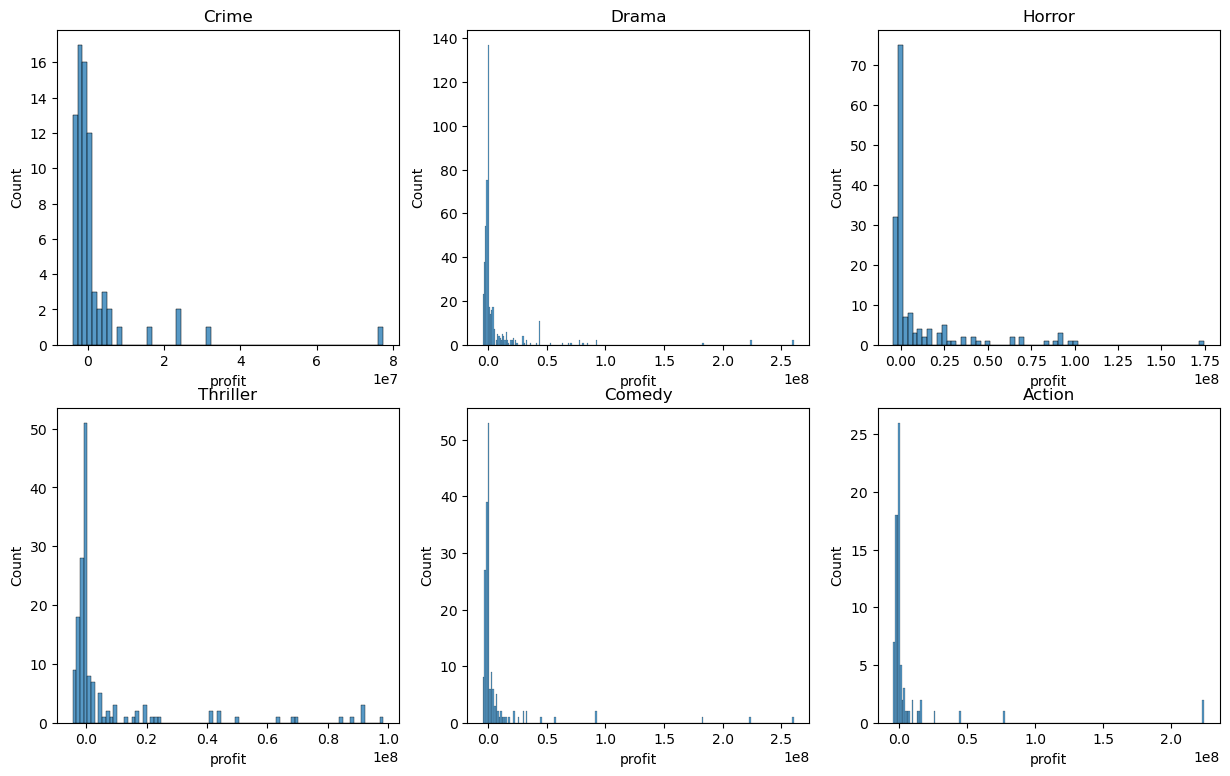

In [68]:
profit_genre = low_budget_movies.merge(genres_list, left_on="movie", right_on="primary_title")
crime = profit_genre[profit_genre["genres"].str.contains("Crime", na=False)]
drama = profit_genre[profit_genre["genres"].str.contains("Drama", na=False)]
horror = profit_genre[profit_genre["genres"].str.contains("Horror", na=False)]
thriller = profit_genre[profit_genre["genres"].str.contains("Thriller", na=False)]
comedy = profit_genre[profit_genre["genres"].str.contains("Comedy", na=False)]
action = profit_genre[profit_genre["genres"].str.contains("Action", na=False)]

fig, ax = plt.subplots(2, 3, figsize=[15,9])
sns.histplot(data=crime, x="profit", ax=ax[0][0])
ax[0][0].set_title("Crime")

sns.histplot(data=drama, x="profit", ax=ax[0][1])
ax[0][1].set_title("Drama")

sns.histplot(data=horror, x="profit", ax=ax[0][2])
ax[0][2].set_title("Horror")

sns.histplot(data=thriller, x="profit", ax=ax[1][0])
ax[1][0].set_title("Thriller")

sns.histplot(data=comedy, x="profit", ax=ax[1][1])
ax[1][1].set_title("Comedy")

sns.histplot(data=action, x="profit", ax=ax[1][2])
ax[1][2].set_title("Action")



In [69]:
profits_genre = {"Crime": list(crime["profit"]), "Drama": list(drama["profit"]),
                 "Horror": list(horror["profit"]), "Thriller": list(thriller["profit"]),
                 "Comedy": list(comedy["profit"]), "Action": list(action["profit"])}


df5 = pd.DataFrame()

crime_temp = pd.DataFrame([("Crime",x)for x in crime["profit"]])
df5 = pd.concat([df5,crime_temp])

drama_temp = pd.DataFrame([("Drama",x)for x in drama["profit"]])
df5 = pd.concat([df5,drama_temp])

horror_temp = pd.DataFrame([("Horror",x)for x in horror["profit"]])
df5 = pd.concat([df5,horror_temp])

thriller_temp = pd.DataFrame([("Thriller",x)for x in thriller["profit"]])
df5 = pd.concat([df5,thriller_temp])

comedy_temp = pd.DataFrame([("Comedy",x)for x in comedy["profit"]])
df5 = pd.concat([df5,comedy_temp])

action_temp = pd.DataFrame([("Action",x)for x in action["profit"]])
df5 = pd.concat([df5,action_temp])

df5.columns = ["genre","profit"]

df5.info()




<class 'pandas.core.frame.DataFrame'>
Index: 1145 entries, 0 to 92
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   genre   1145 non-null   object
 1   profit  1145 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 26.8+ KB


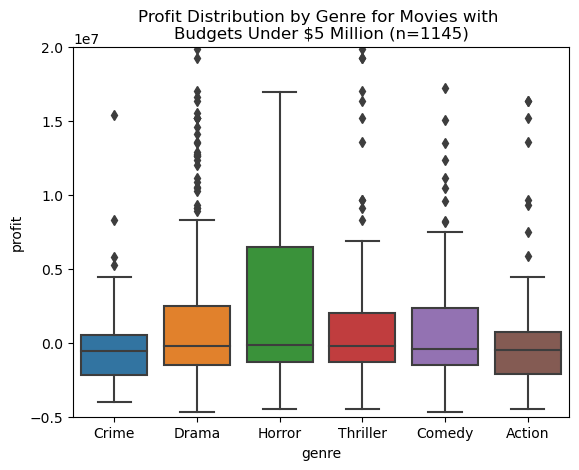

In [193]:
fig, ax = plt.subplots()

sns.boxplot(data=df5, x="genre", y="profit", ax=ax)
ax.set_ylim(-5000000,20000000)
ax.set_title("Profit Distribution by Genre for Movies with \nBudgets Under $5 Million (n=1145)");

In [70]:
df5.groupby("genre").mean()

,profit
genre,
Action,6.538689e+06
Comedy,6.704159e+06
Crime,1.756186e+06
Drama,6.487745e+06
Horror,1.022713e+07
Thriller,7.157338e+06


In [71]:
low_budget_movies.sort_values("profit", ascending=False).head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,rate_return,profit
4567,68,"Dec 15, 1939",Gone with the Wind,3900000,"$198,680,470",390525192,100.134665,386625192
5346,47,"Aug 13, 1942",Bambi,858000,"$102,797,000",268000000,312.354312,267142000
4775,76,"Feb 15, 1950",Cinderella,2900000,"$85,000,000",263591415,90.893591,260691415
4589,90,"Aug 13, 1997",The Full Monty,3500000,"$45,950,122",261249383,74.642681,257749383
5406,7,"Jul 14, 1999",The Blair Witch Project,600000,"$140,539,099",248300000,413.833333,247700000
4424,25,"Mar 9, 1994",Four Weddings and a Funeral,4500000,"$52,700,832",242895809,53.976846,238395809
5210,11,"Nov 21, 1976",Rocky,1000000,"$117,235,147",225000000,225.0,224000000
5492,93,"Sep 25, 2009",Paranormal Activity,450000,"$107,918,810",194183034,431.517853,193733034
5117,18,"Dec 21, 1937",Snow White and the Seven Dwarfs,1488000,"$184,925,486",184925486,124.27788,183437486
4664,65,"Oct 20, 2010",Paranormal Activity 2,3000000,"$84,752,907",177512032,59.170677,174512032


In [73]:
horror.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 2 to 973
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 163 non-null    int64  
 1   release_date       163 non-null    object 
 2   movie              163 non-null    object 
 3   production_budget  163 non-null    int64  
 4   domestic_gross     163 non-null    object 
 5   worldwide_gross    163 non-null    int64  
 6   rate_return        163 non-null    object 
 7   profit             163 non-null    int64  
 8   movie_id           163 non-null    object 
 9   primary_title      163 non-null    object 
 10  original_title     163 non-null    object 
 11  start_year         163 non-null    int64  
 12  runtime_minutes    154 non-null    float64
 13  genres             163 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 19.1+ KB


## ROI and Production Budget
We see that as production budgets increase, the median ROI also increases.  It is important to spend more than $2000000, though, as the ROI moves from negative to positive there.  

Let's target movies with budgets between $4 million and $12 million and look at the difference between low and high ROI grouping.  What features help to predict if a film will be in the low or high ROI grouping? 

In [106]:
df4["rate_return"] = (df4.worldwide_gross-df4.production_budget)/df4.production_budget
df4.loc[df4["production_budget"] < 2000000, "Cost_Group"] = 1
df4.loc[(df4["production_budget"] >= 2000000) & (df4["production_budget"] < 4000000), "Cost_Group"] = 2
df4.loc[(df4["production_budget"] >= 4000000) & (df4["production_budget"] < 6000000), "Cost_Group"] = 3
df4.loc[(df4["production_budget"] >= 6000000) & (df4["production_budget"] < 8000000) , "Cost_Group"] = 4
df4.loc[(df4["production_budget"] >= 8000000) & (df4["production_budget"] < 10000000) , "Cost_Group"] = 5
df4.loc[(df4["production_budget"] >= 10000000) & (df4["production_budget"] < 12000000) , "Cost_Group"] = 6
df4.loc[(df4["production_budget"] >= 12000000), "Cost_Group"] = 7

(-1.0, 10.0)

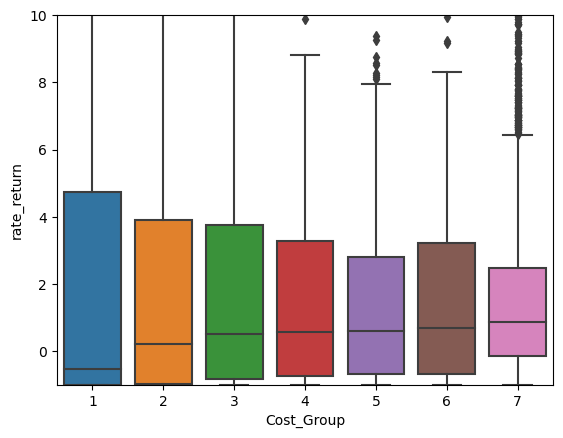

In [107]:
fig, ax = plt.subplots()
sns.boxplot(data=df4, x="Cost_Group", y="rate_return", ax=ax )
ax.set_ylim(-1,10)

## What Features Determine Whether its a low or high ROI Film?
### Genre
We see that Mystery, Music, Animation, Horror, and Fantasy all have a better than 50% chance of returning a profit.

In [111]:
df4["profitable"] = df4["rate_return"] > 1
df4

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,rate_return,profit,Cost_Group,profitable
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279,5.532577,2351345279,7,True
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,1.546673,635063875,7,True
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350,-0.572108,-200237650,7,False
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,3.243841,1072413963,7,True
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,3.153696,999721747,7,True
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,$0,0,-1.000000,-7000,1,False
5778,79,"Apr 2, 1999",Following,6000,"$48,482",240495,39.082500,234495,1,True
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,"$1,338",1338,-0.732400,-3662,1,False
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,$0,0,-1.000000,-1400,1,False


In [124]:
genre_roi = df4.merge(genres_list,left_on="movie", right_on="primary_title")

In [126]:
genre_roi["genres"] = genre_roi["genres"].str.split(",")


In [131]:
genre_roi = genre_roi.explode("genres")

In [144]:
genre_roi = genre_roi[(genre_roi["production_budget"]<12000000) & (genre_roi["production_budget"]>=2000000)].groupby(["genres"]).mean(numeric_only=True)
data = genre_roi.sort_values("profitable", ascending=False)[:6]
data

,id,production_budget,worldwide_gross,rate_return,profit,profitable,start_year,runtime_minutes
genres,,,,,,,,
Mystery,52.629630,6.124659e+06,4.221867e+07,6.340995,3.609401e+07,0.580247,2014.679012,97.805195
Music,64.464286,5.775000e+06,3.356964e+07,6.114438,2.779464e+07,0.535714,2013.678571,101.535714
Animation,59.933333,5.425233e+06,3.253910e+07,7.178906,2.711386e+07,0.533333,2014.266667,79.090909
Horror,59.763158,5.694522e+06,3.665284e+07,5.667169,3.095832e+07,0.526316,2014.447368,94.411348
Fantasy,58.027027,4.709648e+06,4.898185e+07,14.236632,4.427220e+07,0.513514,2014.810811,100.242424
Musical,60.571429,4.463518e+06,5.772193e+07,16.496030,5.325841e+07,0.500000,2015.571429,108.545455


<Axes: xlabel='genres', ylabel='profitable'>

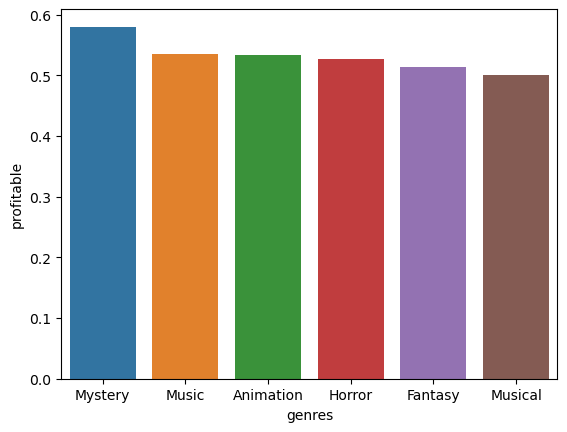

In [146]:
sns.barplot(data=data, x=data.index, y="profitable")

### Production Studio
Large institutional movie students have success in making lower-budget movies (especially Universal and Paramount).  These movie studios have specialities in drama, horror, and thriller genres at these cost points.  (Look at success rate)
- Universal (88% of films profitable)
- LionGate Films (87% of films profitable)
- Paramount (82% of films profitable)  

The 

In [155]:
df_studio_prof = df4.merge(df, left_on="movie", right_on="title")

In [182]:
studio_counts = df_studio_prof[df_studio_prof.production_budget<12000000].groupby("studio").count()
target_studios = list(studio_counts[studio_counts.id > 10].index)

studio_results = df_studio_prof[df_studio_prof.production_budget<12000000].groupby("studio").mean(numeric_only=True)
target_studios = pd.DataFrame(target_studios, columns=["studio"])
target_studios = target_studios.merge(studio_results["profitable"], left_on="studio", right_on="studio").sort_values("profitable", ascending=False)
target_studios

,studio,profitable
10,Wein.,0.928571
9,Uni.,0.882353
4,LGF,0.866667
6,Par.,0.818182
1,Focus,0.615385
2,FoxS,0.555556
7,RAtt.,0.533333
0,A24,0.500000
8,SPC,0.434783
3,IFC,0.318182


<Axes: xlabel='studio', ylabel='profitable'>

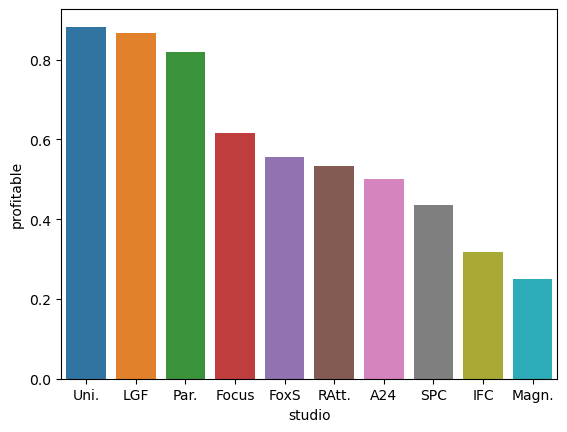

In [184]:
sns.barplot(data=target_studios[1:], x="studio", y="profitable")

In [185]:
df4

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,rate_return,profit,Cost_Group,profitable
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279,5.532577,2351345279,7,True
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,1.546673,635063875,7,True
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350,-0.572108,-200237650,7,False
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,3.243841,1072413963,7,True
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,3.153696,999721747,7,True
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,$0,0,-1.000000,-7000,1,False
5778,79,"Apr 2, 1999",Following,6000,"$48,482",240495,39.082500,234495,1,True
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,"$1,338",1338,-0.732400,-3662,1,False
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,$0,0,-1.000000,-1400,1,False


In [227]:
temp = df_studio_prof[(df_studio_prof["production_budget"] < 12000000)]
studios = pd.DataFrame(["Uni.", "LGF", "Par."], columns=["studio"])
target_movies = studios.merge(temp, left_on="studio", right_on="studio")
target_movies = target_movies.merge(genres_list, left_on="title", right_on="primary_title")
target_movies["genres"] = target_movies["genres"].str.split(",")
target_movies = target_movies.explode("genres")

target_genre = target_movies.groupby(["studio", "profitable", "genres"]).count()
target_genre[target_genre["id"] >= 5]["id"]

studio  profitable  genres  
LGF     True        Comedy       6
                    Drama        6
                    Horror       5
                    Thriller     5
Par.    True        Horror       7
                    Mystery      5
Uni.    True        Drama        9
                    Horror      16
                    Mystery      8
                    Romance      6
                    Thriller    15
Name: id, dtype: int64

#### Are these also high-quality movies?
- Is there a correlation between ROI and Percent Fresh?

### Who are some of the writers that these studios have been successful with?  What schools are they coming from?